In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sys

plt.style.use('default')

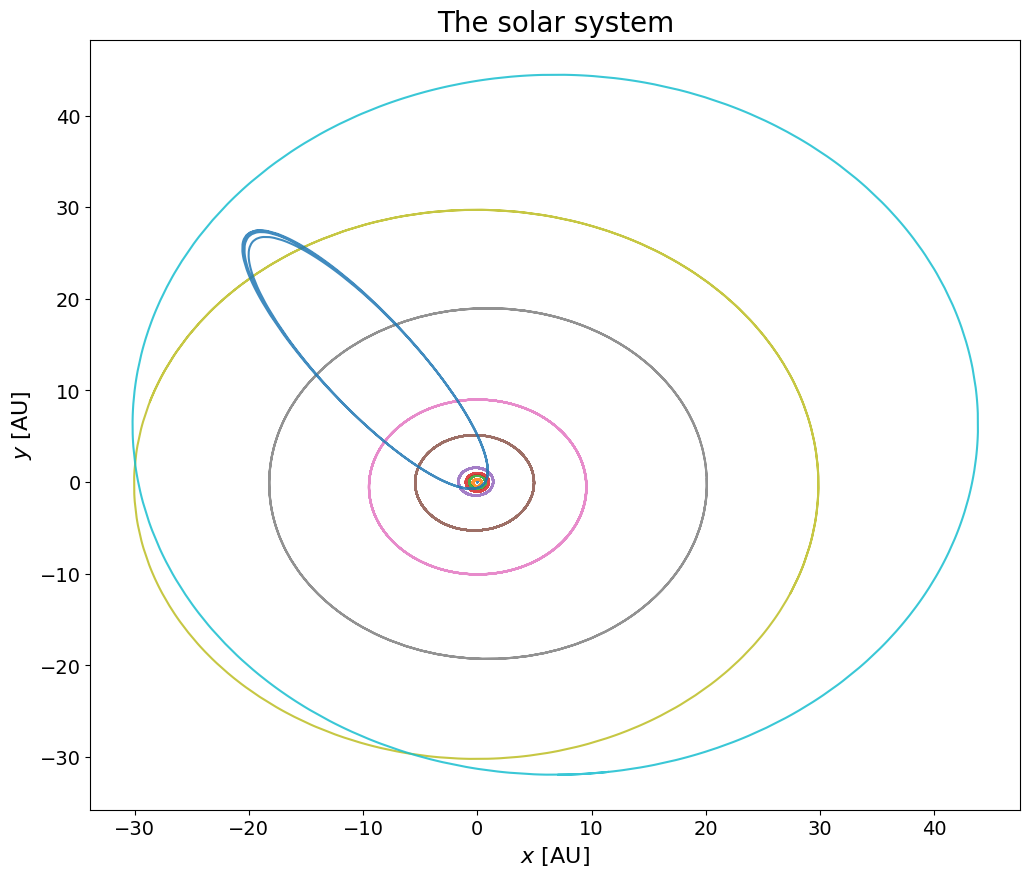

In [23]:
CelestialBodies = 11
N = np.linspace(0,4*(CelestialBodies-1),CelestialBodies)


plt.figure(figsize=(12,10))
for j in N:
  j = int(j)
  x, y= [], [] 
   
  infile = open("RK4Data.dat", 'r')
  for line in infile:           
         a = line.split() 
         x.append(float(a[j]) )
         y.append(float(a[1+j]))
  infile.close()

  plt.plot(x, y, alpha=0.85)
plt.title('The solar system',fontsize=20)
plt.xlabel('$x$ [AU]',fontsize=16)
plt.ylabel('$y$ [AU]',fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()